In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(ride_data, city_data, on = "city", how ="left")
combined_data = combined_data.set_index("type")
#combined_data.head()

## Bubble Plot of Ride Sharing Data

In [2]:
combined_group = combined_data.groupby(["type", "city"])
type_count = pd.DataFrame(combined_group["ride_id"].count())
type_count["avg_fare"] = combined_group["fare"].mean()
type_count["driver_count"] = combined_group["driver_count"].sum()
#type_count.head()

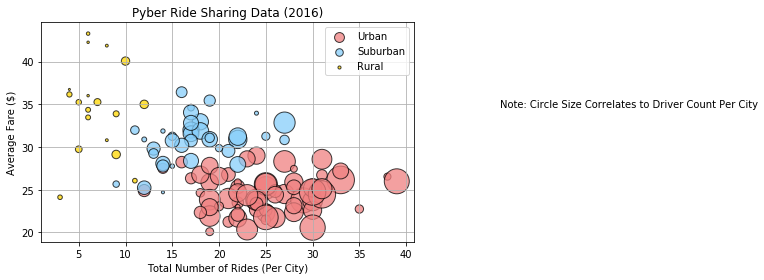

<Figure size 432x288 with 0 Axes>

In [18]:
# Obtain the x and y coordinates for each of the three city types
urban_x=type_count.loc["Urban","ride_id"]
urban_y=type_count.loc["Urban","avg_fare"]
urban_circle_size = type_count.loc["Urban","driver_count"]
urban_plot = plt.scatter(urban_x, urban_y, marker="o", facecolors="lightcoral", edgecolors="black", s=urban_circle_size/3, alpha=0.75)


suburban_x=type_count.loc["Suburban","ride_id"]
suburban_y=type_count.loc["Suburban","avg_fare"]
suburban_circle_size = type_count.loc["Suburban","driver_count"]
suburban_plot = plt.scatter(suburban_x, suburban_y, marker="o", facecolors="lightskyblue", edgecolors="black", s=suburban_circle_size/1.5, alpha=0.75)

rural_x=type_count.loc["Rural","ride_id"]
rural_y=type_count.loc["Rural","avg_fare"]
rural_circle_size = type_count.loc["Rural","driver_count"]
rural_plot = plt.scatter(rural_x, rural_y, marker="o", facecolors="gold", edgecolors="black", s=rural_circle_size, alpha=0.75)


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

#linewidths?
# Create a legend
plt.legend(["Urban", "Suburban", "Rural"], loc="best", markerscale= 0.5,)

# Incorporate a text label regarding circle size
plt.text(50, 35, "Note: Circle Size Correlates to Driver Count Per City", horizontalalignment="left", verticalalignment="center")
plt.tight_layout()
plt.grid()
plt.show()

# Save Figure
plt.savefig("Images/Bubble_Plot_of_Ride_Sharing_Data.png")

## Total Fares by City Type

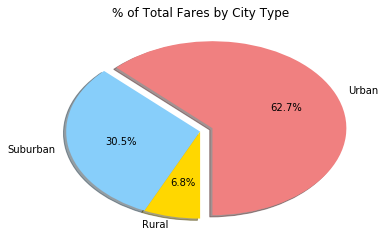

<Figure size 432x288 with 0 Axes>

In [23]:
# Calculate Type Percents
total_fares = combined_data.groupby("type")
total_fares_type = pd.DataFrame(total_fares["ride_id"].count())
total_fares_type["total fares"] = total_fares["fare"].sum()
total_fares_type["sum of fares"] = total_fares_type["total fares"].sum()
total_fares_type["percentage of fares"] = (total_fares_type["total fares"])/(total_fares_type["sum of fares"])*100

total_fares_type

urban_fare = total_fares_type.loc["Urban", "percentage of fares"]
suburban_fare = total_fares_type.loc["Suburban", "percentage of fares"]
rural_fare = total_fares_type.loc["Rural", "percentage of fares"]

totals_pie = [urban_fare, suburban_fare, rural_fare]

#Chart specifics 
colors =["lightcoral", "lightskyblue", "gold"]
labels = ["Urban", "Suburban", "Rural"]
explode = (.1, 0, 0)

# Build Pie Chart
plt.pie(totals_pie, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)

plt.title("% of Total Fares by City Type")
plt.show()

# Save Figure
plt.savefig("Images/Total_Fares_by_citytype.png")

## Total Rides by City Type

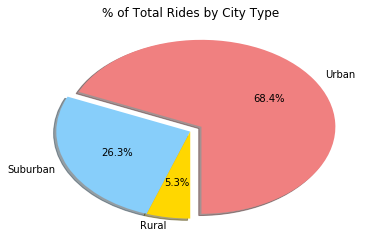

In [20]:
# Calculate Ride Percents

total_rides = combined_data.groupby("type")
total_rides_type = pd.DataFrame(total_rides["ride_id"].count())
total_rides_type["total rides"] = total_rides_type["ride_id"].sum()
total_rides_type["percentage of rides"] = (total_rides_type["ride_id"])/(total_rides_type["total rides"])*100
total_rides_type

urban_type = total_rides_type.loc["Urban", "percentage of rides"]
suburban_type = total_rides_type.loc["Suburban", "percentage of rides"]
rural_type = total_rides_type.loc["Rural", "percentage of rides"]

totals_ride = [urban_type, suburban_type, rural_type]

# Build Pie Chart
plt.pie(totals_ride, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)

plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Images/Total_Rides_by_citytype.png")
plt.show()

## Total Drivers by City Type

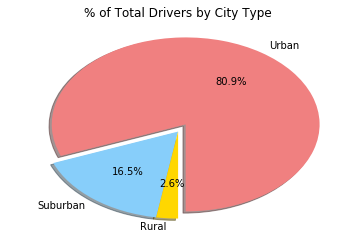

<Figure size 432x288 with 0 Axes>

In [21]:
# Calculate Driver Percents
total_drivers = city_data.groupby("type")
total_drivers_type = pd.DataFrame(total_drivers["driver_count"].sum())
#total_drivers_type["driver"] = total_drivers["driver_count"].sum()
total_drivers_type["total drivers"] = total_drivers_type["driver_count"].sum()
total_drivers_type["percentage of drivers"] = (total_drivers_type["driver_count"])/(total_drivers_type["total drivers"])*100
total_drivers_type

urban_drivers = total_drivers_type.loc["Urban", "percentage of drivers"]
suburban_drivers = total_drivers_type.loc["Suburban", "percentage of drivers"]
rural_drivers = total_drivers_type.loc["Rural", "percentage of drivers"]

totals_drivers_1 = [urban_drivers, suburban_drivers, rural_drivers]

# Build Pie Charts
plt.pie(totals_drivers_1, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)

plt.title("% of Total Drivers by City Type")
plt.show()
# Save Figure
plt.savefig("Images/Total_Drivers_by_citytype.png")

In [ ]:
#Three observable trends:
#1. It is pretty intuitive, but the most drivers, rides and money earned occur in urban enviroments compared to suburban and rural. 
#2. Because rural areas are usually located farther away and have less drivers in the area, the fares for those trips are higher.
#3. Because there are more drivers and riders in urban areas, the fares are cheaper. 